### Introduction to Network Analysis 2024/25 (i)

#  Recitation on *NetworkX* library

The first labs are intended for introduction to the library we will use throughout the course. [*NetworkX*](https://networkx.org) is a Python package that allows for the creation, manipulation, and analysis of networks. Since most of the functions make more sense at the designated labs throughout the year, we will only make a short overview of them. If you want a more in depth overview of the functions used, you can check out the [documentation](https://networkx.org/documentation/stable/reference/introduction.html).

Before starting, make sure you have *NetworkX* installed. If not, try installing it using `pip`.

In [1]:
!pip install networkx

The first step in using *NetworkX* is to import it.

In [2]:
import networkx as nx

## 1. Constructing a graph

Let's create a small toy network. In this case, the network is represented by a simple undirected graph of class `Graph`.

In [3]:
G = nx.Graph(name="toy")

## 2. Adding nodes and edges

Nodes represent entities in a network and edges represent connections between these entities.
<br>

### Adding nodes

You can add nodes to the graph one by one. Each node is added with a unique identifier which can be any hashable object. Additional attributes like `label`, `cluster`, and `value` are optional and can be used to store additional information about the node.

In [4]:
G.add_node(1)
G.add_node(2, label="John Doe")
G.add_node('foo', cluster=1)
G.add_node('bar', value=13.7)
G.add_node('baz')

### Adding edges

Edges are added in a similar manner. The first two arguments are the nodes that the edge will connect. The `weight`
is an optional attribute that can be used to store additional information about the edge.

In [5]:
G.add_edge(1, 2)
G.add_edge(1, 'foo', weight=1.0)
G.add_edge(2, 'foo', weight=2.0)
G.add_edge('foo', 'bar')
G.add_edge('foo', 'baz')

Now let's print our created graph.

In [6]:
print(G)

Graph named 'toy' with 5 nodes and 5 edges


## 3. Visualizing a graph

We can use *NetworkX*'s built-in drawing functionality to visualize a graph. Here's a simple function for visualizing a graph with a wiring diagram.

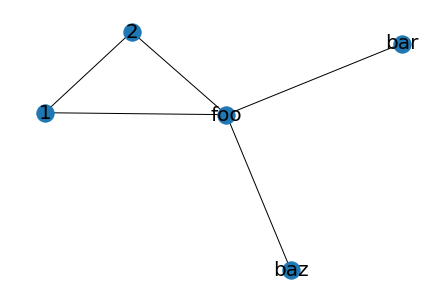

In [7]:
import matplotlib.pyplot as plt

def draw(G, font_size=20, **args):
    nx.draw(G, with_labels=True, font_size=font_size, **args)
    plt.show()

draw(G)

## 4. Inspecting a graph

*NetworkX* provides methods to list the nodes and edges of a graph (along with their attributes).

In [8]:
print(G.nodes())
print(G.nodes(data=True))

print(G.edges())
print(G.edges(data=True))

[1, 2, 'foo', 'bar', 'baz']
[(1, {}), (2, {'label': 'John Doe'}), ('foo', {'cluster': 1}), ('bar', {'value': 13.7}), ('baz', {})]
[(1, 2), (1, 'foo'), (2, 'foo'), ('foo', 'bar'), ('foo', 'baz')]
[(1, 2, {}), (1, 'foo', {'weight': 1.0}), (2, 'foo', {'weight': 2.0}), ('foo', 'bar', {}), ('foo', 'baz', {})]


We can also list all the neighboring nodes of a specific node...

In [9]:
print(list(G.neighbors('foo')))
print(G.adj['foo']) # or just G['foo']
print(G.edges('foo', data=True))

[1, 2, 'bar', 'baz']
{1: {'weight': 1.0}, 2: {'weight': 2.0}, 'bar': {}, 'baz': {}}
[('foo', 1, {'weight': 1.0}), ('foo', 2, {'weight': 2.0}), ('foo', 'bar', {}), ('foo', 'baz', {})]


...and retrieve its attributes or degree (number of incident edges).

In [10]:
print(G.nodes['foo'])
print(G.degree['foo'])

{'cluster': 1}
4


## 5. Basic graph statistics

*NetworkX* provides functions to compute the number of nodes and edges, and the degree of each node in the graph.

In [11]:
print(G.number_of_nodes()) # or just len(G)
print(G.number_of_edges())
print(G.degree())

5
5
[(1, 2), (2, 2), ('foo', 4), ('bar', 1), ('baz', 1)]


## 6. Modifying a graph

We can remove existing nodes and edges from the graph.

Graph named 'toy' with 4 nodes and 2 edges


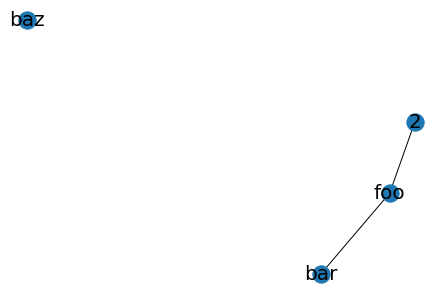

In [12]:
G.remove_node(1)
G.remove_edge('baz', 'foo')

print(G)
draw(G)

## 7. Converting to a directed graph

Let's convert the undirected graph `G` to a directed graph of class `DiGraph`, and add one new edge.

DiGraph named 'toy' with 4 nodes and 5 edges


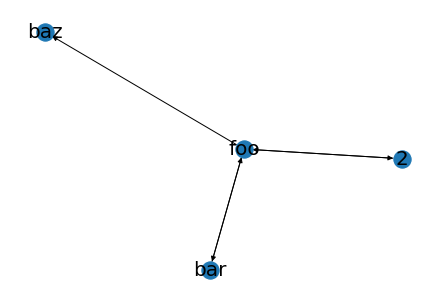

In [13]:
D = nx.DiGraph(G)
D.add_edge('foo', 'baz')

print(D)
draw(D)

We can again list all edges, and also the neighbors, predecessors and successors of a specified node.

In [14]:
print(D.edges())

print(list(D.neighbors('foo')))
print(list(D.predecessors('foo')))
print(list(D.successors('foo')))

[(2, 'foo'), ('foo', 2), ('foo', 'bar'), ('foo', 'baz'), ('bar', 'foo')]
[2, 'bar', 'baz']
[2, 'bar']
[2, 'bar', 'baz']


## 8. Converting to a multigraph

A `MultiGraph` is a flexible graph class that allows multiple undirected edges between pairs of nodes. The additional edge attribute `label` can be used to distinguish these edges.

MultiGraph named 'toy' with 4 nodes and 3 edges


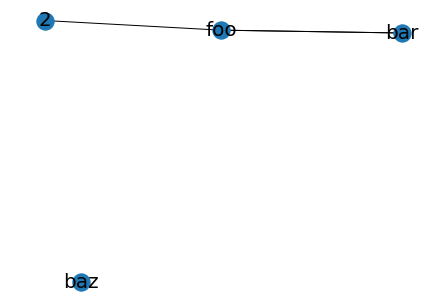

In [15]:
M = nx.MultiGraph(G)
M.add_edge('foo', 'bar', label="new")

print(M)
draw(M)

Let's again list all edges and the neighbors of a specified node.

In [16]:
print(M.edges())

print(list(M.neighbors('foo')))
print(M['foo'])
print(M.edges('foo', data=True))

[(2, 'foo'), ('foo', 'bar'), ('foo', 'bar')]
[2, 'bar']
{2: {0: {'weight': 2.0}}, 'bar': {0: {}, 1: {'label': 'new'}}}
[('foo', 2, {'weight': 2.0}), ('foo', 'bar', {}), ('foo', 'bar', {'label': 'new'})]


## 9. Constructing a random graph

*NetworkX* can generate random graphs using various models. The `gnm_random_graph` function generates a random graph with a specified number of nodes and edges.

Graph with 50 nodes and 100 edges


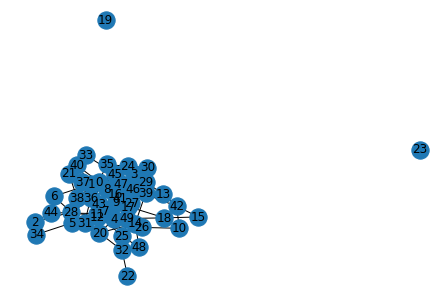

In [17]:
G = nx.gnm_random_graph(50, 100)

print(G)
draw(G, font_size=12)

## 10. Reading network from a file

*NetworkX* can read and write graphs in various formats. Here's an example of reading a graph from a *Pajek* file.

MultiGraph with 62 nodes and 159 edges


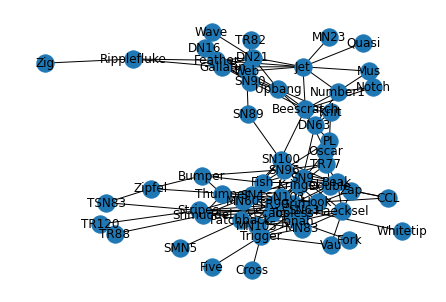

In [18]:
G = nx.read_pajek("../nets/dolphins.net")

print(G)
draw(G, font_size=12)

If our node identifiers are not integers, we can convert them to integers.

In [19]:
print(G.nodes(data=True))

G = nx.convert_node_labels_to_integers(G, label_attribute='label')

print(G.nodes(data=True))

[('Beak', {'id': '1'}), ('Beescratch', {'id': '2'}), ('Bumper', {'id': '3'}), ('CCL', {'id': '4'}), ('Cross', {'id': '5'}), ('DN16', {'id': '6'}), ('DN21', {'id': '7'}), ('DN63', {'id': '8'}), ('Double', {'id': '9'}), ('Feather', {'id': '10'}), ('Fish', {'id': '11'}), ('Five', {'id': '12'}), ('Fork', {'id': '13'}), ('Gallatin', {'id': '14'}), ('Grin', {'id': '15'}), ('Haecksel', {'id': '16'}), ('Hook', {'id': '17'}), ('Jet', {'id': '18'}), ('Jonah', {'id': '19'}), ('Knit', {'id': '20'}), ('Kringel', {'id': '21'}), ('MN105', {'id': '22'}), ('MN23', {'id': '23'}), ('MN60', {'id': '24'}), ('MN83', {'id': '25'}), ('Mus', {'id': '26'}), ('Notch', {'id': '27'}), ('Number1', {'id': '28'}), ('Oscar', {'id': '29'}), ('Patchback', {'id': '30'}), ('PL', {'id': '31'}), ('Quasi', {'id': '32'}), ('Ripplefluke', {'id': '33'}), ('Scabs', {'id': '34'}), ('Shmuddel', {'id': '35'}), ('SMN5', {'id': '36'}), ('SN100', {'id': '37'}), ('SN4', {'id': '38'}), ('SN63', {'id': '39'}), ('SN89', {'id': '40'}), ('S

## 11. Basic network analysis

PageRank is a centrality measure for nodes in a graph. It assigns a score to each node based on its connections.

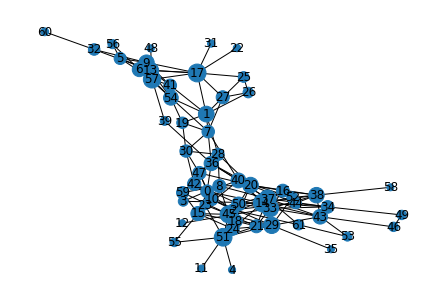

In [20]:
scores = nx.pagerank(G)

sizes = [1e4 * scores[i] for i in G.nodes()]

draw(G, font_size=12, node_size=sizes)

*NetworkX* provides several algorithms for detecting network community structure.

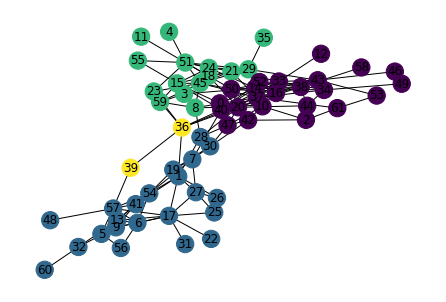

In [21]:
comms = nx.algorithms.community.greedy_modularity_communities(G)

colors = [0] * len(G)
for c, comm in enumerate(comms):
    for i in comm:
        colors[i] = c

draw(G, font_size=12, node_color=colors)